In [12]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import ensemble
import time

In [13]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [27]:
cls_train.shape

(50000,)

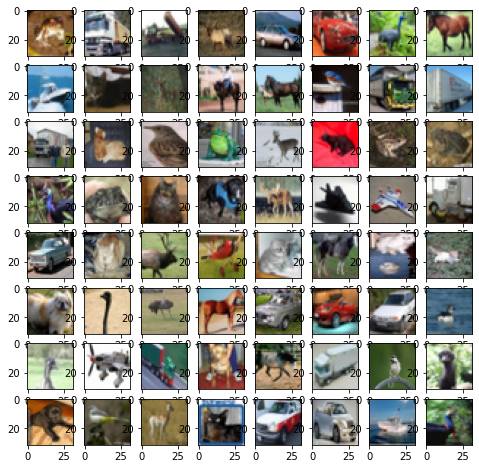

In [18]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [19]:
pca = PCA()
pca.fit(labels_train)

PCA()

In [20]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total<0.99:
    current_sum += pca.explained_variance_[k]
    k = k+1
k

9

In [24]:
pca_cifar = PCA(n_components = 9,whiten = True)
x_transformed = pca_cifar.fit_transform(labels_train)
x_transformed.shape

(50000, 9)

In [25]:
x_train_pca = x_transformed
x_test_pca = pca_cifar.transform(labels_test)

In [30]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train_pca,cls_train)
y_pred = rf.predict(x_test_pca)
accuracy_score(cls_test,y_pred)

1.0

In [44]:
set(y_pred)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [45]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [46]:
pred_name = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        pred_name.append('airplane')
    if y_pred[i] == 1:
        pred_name.append('automobile')
    if y_pred[i] == 2:
        pred_name.append('bird')
        
    if y_pred[i] == 3:
        pred_name.append('cat')
    if y_pred[i] == 4:
        pred_name.append('deer')
    if y_pred[i] == 5:
        pred_name.append('dog')
        
    if y_pred[i] == 6:
        pred_name.append('frog')
        
    if y_pred[i] == 7:
        pred_name.append('horse')
        
    if y_pred[i] == 8:
        pred_name.append('ship')
        
    if y_pred[i] == 9:
        pred_name.append('truck')
        

In [52]:
import numpy as np
np.savetxt('ms1.csv', pred_name,fmt = "%s" )